<a href="https://colab.research.google.com/github/JCefla/SIM_YAC_LEMA_UPSE2023/blob/main/Modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
#Simulador de ecuacion de difusividad
import numpy as np
L=1000 #distancia total
dx=100 #delta x
Distance=np.arange(0,L+1,dx) #Crear un vector de las distancias
P01=np.ones_like(Distance) #Vector inicial de presiones
print(P01)

[1 1 1 1 1 1 1 1 1 1 1]


In [105]:
PYac=4000
PFrontd=0 #Frontera derecha
PFronti=0 #Fonrtera izquierda
Tiempo=100000
DT=10
VectorTiempo=np.arange(0,math.floor(Tiempo/DT)*DT,DT)
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
Pdt=np.zeros_like(Distance)
     

In [106]:
PXX.shape

(10000, 11)

In [107]:
P01=np.ones_like(Distance)
P01=P01*PYac
P01[0]=PFronti
P01[len(P01)-1]=PFrontd
P0in=P01 #Condicion inicial
Pdt=P01 #Vector de resultados dt
t=DT #primera interacion

In [108]:
print(P01)

[   0 4000 4000 4000 4000 4000 4000 4000 4000 4000    0]


In [109]:
def Presdt(P1,P2,P3,deltat,deltax):
  return(((P1-2*P2+P3)/(deltax**2))*deltat)+P2

In [110]:
Preal=np.ones_like(PXX)
Preal.shape
P0in.shape

(11,)

In [111]:
from IPython.utils.syspathcontext import prepended_to_syspath
while t<Tiempo:
    for i in range(0,len(P0in)-1):
      if i==0:
        Pdt[i]=P0in[0]
      elif i==len(P0in)-1:
        Pdt[i]=P0in[len(P0in)-1]
      else:
        Pdt[i]=Presdt(P0in[i-1],P0in[i],P0in[i+1],DT,dx)
    t=t+DT
    P0in=Pdt
    P01=np.append(P01,Pdt)

In [112]:
print(P01)

[   0 3996 3999 ...    0    0    0]


In [113]:
#Aplicacion grafica de la Ecuacion de Difusividad
import numpy as np
import math
L=1000 #distancia total
dx=100 #delta x
Distance=np.arange(0,L+1,dx) #Crear un vector de las distancias
P01=np.ones_like(Distance) #Vector inicial de Presiones
print(P01)



[1 1 1 1 1 1 1 1 1 1 1]


In [114]:
PYac=4000
PFrontd=0 #Frontera derecha
PFronti=0 #Fonrtera izquierda
Tiempo=100000
DT=10
VectorTiempo=np.arange(0,math.floor(Tiempo/DT)*DT,DT)
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
Pdt=np.zeros_like(Distance)

In [115]:
PXX.shape

(10000, 11)

In [116]:
P01=np.ones_like(Distance)
P01=P01*PYac
P01[0]=PFronti
P01[len(P01)-1]-PFrontd
P0in=P01 #Condicion inicial
Pdt=P01 #Vector de resultados dt
t=DT #Primera interacion

In [117]:
print(P01)

[   0 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000]


In [118]:
def Presdt(P1,P2,P3,deltat,deltax):
  return(((P1-2*P2+P3)/(deltax**2))*deltat)+P2

In [119]:
Preal=np.ones_like(PXX)
Preal.shape
P0in.shape

(11,)

In [120]:
PXX[0]-P01
while t<Tiempo:
    for i in range(0,len(P0in)-1):
      if i==0:
        Pdt[i]=P0in[0]
      elif i==len(P0in)-1:
        Pdt[i]=P0in[len(P0in)-1]
      else:
        Pdt[i]=Presdt(P0in[i-1],P0in[i],P0in[i+1],DT,dx)
        PXX[math.floor(t/DT)]=Pdt
    t=t+DT
    P0in=Pdt
    P01=np.append(P01,Pdt)

In [121]:
PXX

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0., 3996., 3999., ..., 3999., 3999., 4000.],
       [   0., 3992., 3998., ..., 3998., 3999., 4000.],
       ...,
       [   0.,  400.,  800., ..., 3200., 3600., 4000.],
       [   0.,  400.,  800., ..., 3200., 3600., 4000.],
       [   0.,  400.,  800., ..., 3200., 3600., 4000.]])

In [122]:
PXX.shape

(10000, 11)

In [123]:
Distance.shape

(11,)

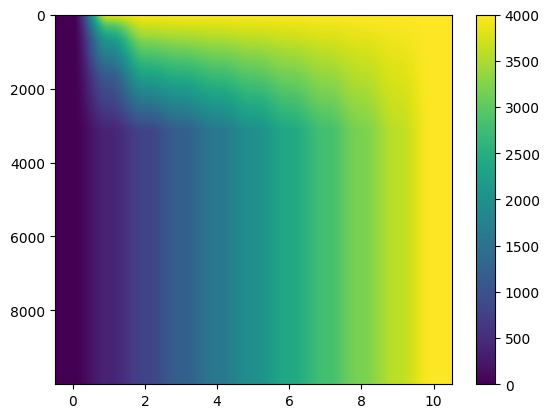

In [124]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(PXX,aspect='auto')
plt.colorbar()

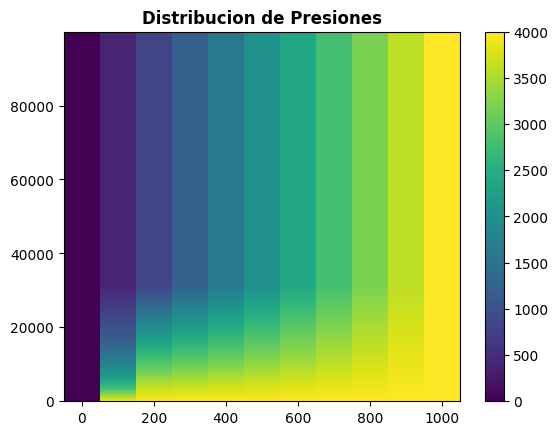

In [125]:
c = plt.pcolormesh(Distance,VectorTiempo,PXX)
plt.colorbar(c)
 
plt.title('Distribucion de Presiones', fontweight ="bold")
plt.show()

In [126]:
math.pi

3.141592653589793

NameError: ignored

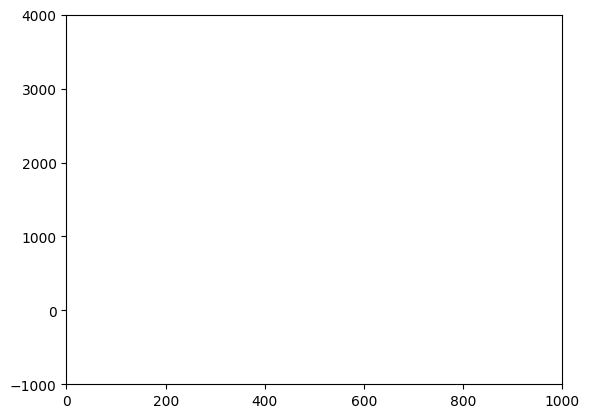

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.animation as animation


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1000))
ax.set_ylim((-1000, 4000))

line, = ax.plot([], [], lw=2)
#line2, = ax.plot([], [], lw=2)
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def init():
    line2.set_data([], [])
    return (line2,)

# animation function. This is called sequentially
def animate(i):
    x = Distance
    y = PXX[i]
    line.set_data(x, y)
    #line2.set_data(y, x)
    ax.set(title='Presion  days ' + str(i*DT))
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,10000,200), interval=200, blit=True)
HTML(anim.to_html5_video())